In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# NEW ZEALAND - COVID-19 DATA ANALYSIS

#### Auth: Albert Zhang

In [2]:

import time
import datetime

##time_now
now = datetime.datetime.now()
print(now)


2020-03-28 11:35:30.633384


In [3]:
x = datetime.datetime.now()

print(x.strftime("%x"))

03/28/20


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

%pip --version

pip 19.2.3 from E:\Anaconda3\lib\site-packages\pip (python 3.7)

Note: you may need to restart the kernel to use updated packages.


In [5]:
import urllib
from IPython.core.display import HTML

HTML("<iframe src=https://www.health.govt.nz/our-work/diseases-and-conditions/covid-19-novel-coronavirus/covid-19-current-situation/covid-19-current-cases width=1100 height=500></iframe>")


E:\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [6]:
# imports
import requests # How Python gets the webpages
import re
from openpyxl import workbook  # 写入Excel表所用
from openpyxl import load_workbook  # 读取Excel表所用 # Creates structured, searchable object
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

import os

In [7]:
#import xlsxwriter

In [8]:
#workbook   = xlsxwriter.Workbook('NZdata.xlsx')
#worksheet1 = workbook.add_worksheet()
#worksheet2 = workbook.add_worksheet()

#worksheet1.write('A1', 123)

#workbook.close()

In [9]:
from pylab import rcParams #this module gives us some controls over plot rendering attributes
rcParams['figure.figsize'] = 15, 10

### Importing Time Series Data

In [10]:
ts_data = pd.read_csv(r"C:\Users\a1240\Desktop\COVID-19\nz_data\Total_nz.csv")

ts_data.head()

,Date,Total to date,New in last 24 hours,Total of Recovered,Total,Total population(million - 2017)
0,2020/2/26,0.0,0.0,NaN,338.0,4.794
1,2020/2/27,0.0,0.0,NaN,NaN,NaN
2,2020/2/28,1.0,1.0,NaN,NaN,NaN
3,2020/2/29,1.0,0.0,NaN,NaN,NaN
4,2020/3/1,1.0,0.0,NaN,NaN,NaN


In [11]:
ts_data.tail()

,Date,Total to date,New in last 24 hours,Total of Recovered,Total,Total population(million - 2017)
53,2020/4/19,NaN,NaN,NaN,NaN,NaN
54,2020/4/20,NaN,NaN,NaN,NaN,NaN
55,2020/4/21,NaN,NaN,NaN,NaN,NaN
56,2020/4/22,NaN,NaN,NaN,NaN,NaN
57,2020/4/23,NaN,NaN,NaN,NaN,NaN


In [12]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
Date                                58 non-null object
Total to date                       31 non-null float64
New in last 24 hours                31 non-null float64
Total of Recovered                  1 non-null float64
Total                               1 non-null float64
Total population(million - 2017)    1 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.8+ KB


In [13]:
#ts_data_forecast['Date'] = pd.to_datetime(ts_data['Date'], format='%Y-%m-%d')
#ts_data.info()

In [14]:
ts_data_forecast = ts_data
ts_data_forecast.head()

,Date,Total to date,New in last 24 hours,Total of Recovered,Total,Total population(million - 2017)
0,2020/2/26,0.0,0.0,NaN,338.0,4.794
1,2020/2/27,0.0,0.0,NaN,NaN,NaN
2,2020/2/28,1.0,1.0,NaN,NaN,NaN
3,2020/2/29,1.0,0.0,NaN,NaN,NaN
4,2020/3/1,1.0,0.0,NaN,NaN,NaN


In [15]:
ts_data_forecast['Date'] = pd.to_datetime(ts_data_forecast['Date'])
ts_data_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
Date                                58 non-null datetime64[ns]
Total to date                       31 non-null float64
New in last 24 hours                31 non-null float64
Total of Recovered                  1 non-null float64
Total                               1 non-null float64
Total population(million - 2017)    1 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.8 KB


In [16]:
#ts_data_forecast['Date'] = ts_data_forecast.set_index(ts_data_forecast['Date'])
#ts_data_forecast.index

In [17]:
ts_data_forecast.head()

,Date,Total to date,New in last 24 hours,Total of Recovered,Total,Total population(million - 2017)
0,2020-02-26,0.0,0.0,NaN,338.0,4.794
1,2020-02-27,0.0,0.0,NaN,NaN,NaN
2,2020-02-28,1.0,1.0,NaN,NaN,NaN
3,2020-02-29,1.0,0.0,NaN,NaN,NaN
4,2020-03-01,1.0,0.0,NaN,NaN,NaN


In [18]:
ts_data_forecast['Total to date'].max()

338.0

### Converting into Time Series Data

In [19]:
#ts_data_total = ts_data.set_index(['Date','Total to date','New in last 24 hours'])
#ts_data_total.head()

In [20]:
#ts_data_total.columns

In [21]:
N = len(ts_data_forecast)
ind = np.arange(N)

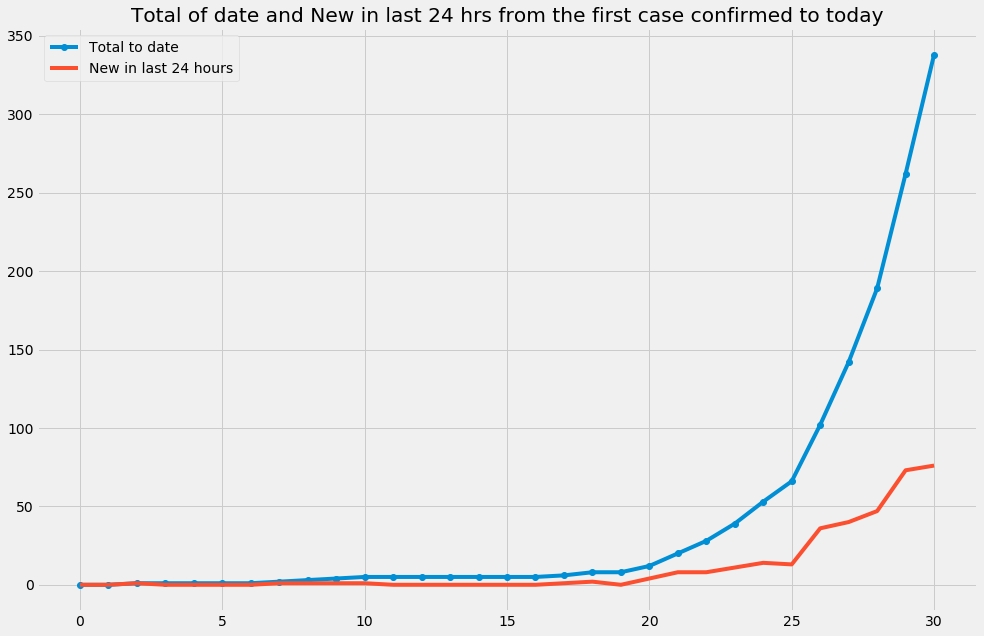

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ind, ts_data_forecast['Total to date'], 'o-', label='Total to date')
ax.plot(ind, ts_data_forecast['New in last 24 hours'], '-', label='New in last 24 hours')
ax.set_title(u"Total of date and New in last 24 hrs from the first case confirmed to today")
ax.legend(loc='upper left')

plt.show()

In [23]:
#ts_data_forecast['shifted'] = ts_data_forecast['Total to date'].shift(1)
#ts_data_forecast

In [24]:
# population
N = 4794000
# simuation Time / Day
T = 28

In [25]:
def Logisticfquation(t,N,P0,r):
    t0=0
    exp_index=np.exp(r*t-t0)
    return(N*exp_index*P0)/N+(exp_index-1)*P0



In [26]:
import seaborn as sns
from scipy.optimize import curve_fit
import scipy.integrate as spi
import numpy as np
# import pylab as pl
import matplotlib.pyplot as pl
import pandas as pd

In [27]:
##

ts_data_forecast['ID'] = ts_data_forecast.index
ts_data_forecastts_1 = ts_data_forecast

In [28]:
ts_data_forecastts_1.head()

,Date,Total to date,New in last 24 hours,Total of Recovered,Total,Total population(million - 2017),ID
0,2020-02-26,0.0,0.0,NaN,338.0,4.794,0
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,1
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,2
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,3
4,2020-03-01,1.0,0.0,NaN,NaN,NaN,4


In [29]:
t = np.array(ts_data_forecastts_1["ID"])
P = np.array(ts_data_forecastts_1["Total to date"])

AttributeError: module 'matplotlib.pyplot' has no attribute 'legent'

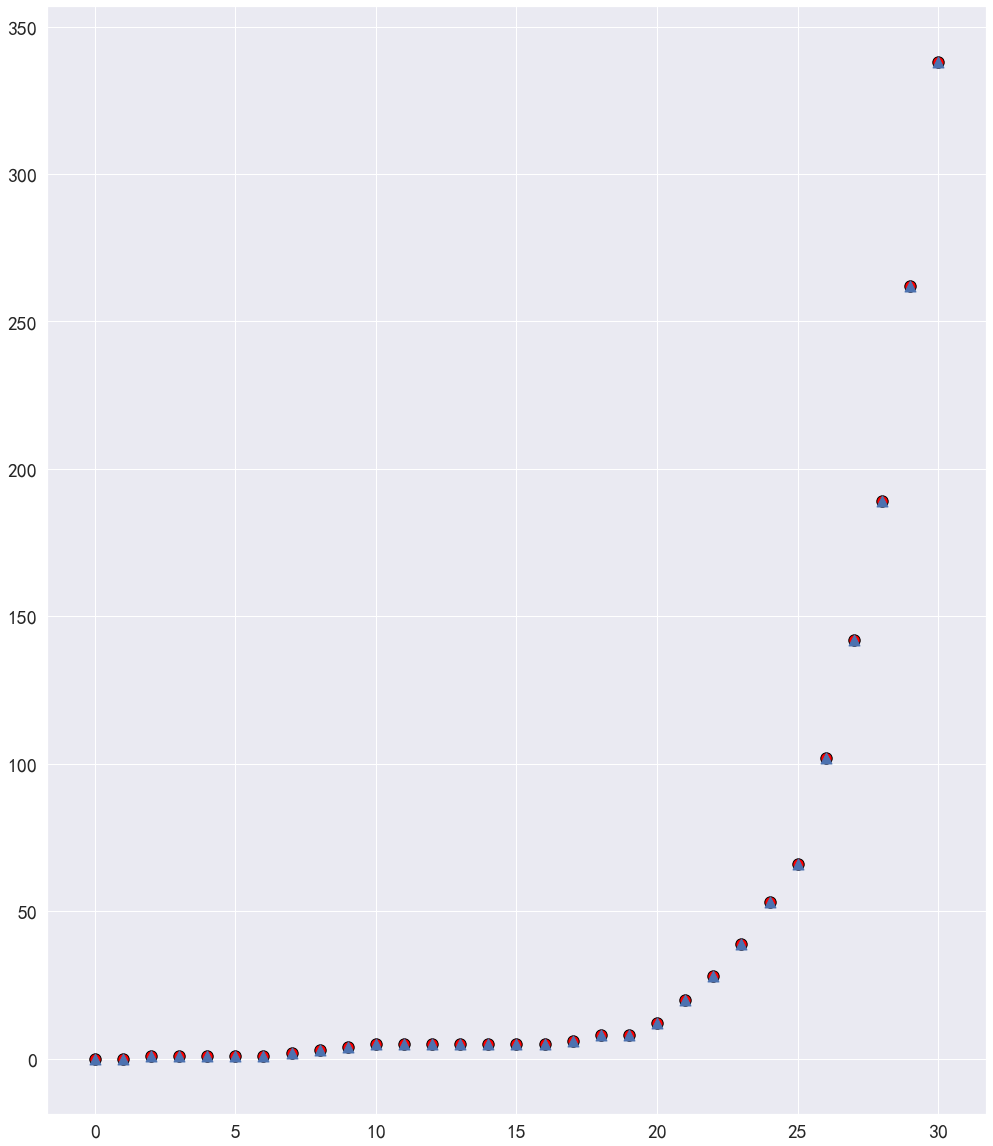

In [30]:
##
sns.set(font_scale = 1.8, font = 'SimHei')
df_future = ts_data_forecast
fig,ax = plt.subplots(figsize=(15,19))
#ax.plot( 'r', lw=2, label = 'Forecast_nz')
ax.scatter(t,P,s=130,facecolor='red',edgecolors='black',
           label='training data(before 2020-3-27)')
ax.scatter(df_future['ID'],df_future['Total to date'],s=120,marker='^',
            label='test data')

plt.legent(loc='lower right')
plt.xlabel('Date')
plt.ylabel('Total to date')
plt.title('Forecast_NZ')
plt.show()

In [ ]:
ts_data_forecastts_1.head()

I0 = 338
#计算β值，用确诊病例除以密切接触者人数
gammaguess = (data["治愈"]+data["死亡"])/data["感染者"]
print(gammaguess)
gamma = gammaguess[-7:-1].mean()
print(gamma)
beta = gamma*2.0
print(beta)
fig = pl.figure()
pl.plot(gammaguess)
pl.savefig("gama.png")

 #γ值设定为0.04，即一般病程25天
 #用最小二乘法估计β值和初始易感人数
gamma = 0.04
S0 = [i for i in range(20000, 40000, 1000)]
beta = [f for f in np.arange(1e-7, 1e-4, 1e-7)]

# 定义偏差函数
def error(res):
err = (data["感染者"].iloc[:21] - res)**2
errsum = sum(err)
return errsum

 #穷举法，找出与实际数据差的平方和最小的S0和beta值
# 结果 S0 = 39000, β = 8e-6
minSum = 1e10
minS0 = 0.0
minBeta = 0.0
bestRes = None
for S in S0:
for b in beta:
    # 模型的差分方程
            def diff_eqs_2(INP, t):
                Y = np.zeros((3))
                V = INP
                Y[0] = -b * V[0] * V[1]
                Y[1] = b * V[0] * V[1] - gamma * V[1]
                Y[2] = gamma * V[1]
                return Y
# 数值解模型方程
        INPUT = [S, I0, 0.0]
            RES = spi.odeint(diff_eqs_2, INPUT, t_range)
            errsum = error(RES[:21, 1])
            if errsum < minSum:
                minSum = errsum
                minS0 = S
                minBeta = b
                bestRes = RES
                print("S0=%d beta=%f minErr=%f" % (S, b, errsum))

    print("S0 = %d β = %f" % (minS0, minBeta))
    
    

[3.e+04 1.e+00 0.e+00]
[3.00000000e+04 1.00002455e+00 4.91053120e-06]
[3.00000000e+04 1.00002455e+00 4.91065176e-06]
[2.99999999e+04 1.00004911e+00 9.82130353e-06]
[2.99999999e+04 1.00004911e+00 9.82142410e-06]
[2.99999938e+04 1.00513105e+00 1.02621088e-03]
[2.99999938e+04 1.00513109e+00 1.02621739e-03]
[2.99999877e+04 1.01023882e+00 2.04776535e-03]
[2.99999877e+04 1.01023889e+00 2.04777841e-03]
[2.99999816e+04 1.01537258e+00 3.07451762e-03]
[2.99999816e+04 1.01537265e+00 3.07453074e-03]
[2.99999560e+04 1.03667001e+00 7.33400926e-03]
[2.99999560e+04 1.03667049e+00 7.33410499e-03]
[2.99999627e+04 1.03109235e+00 6.21847444e-03]
[2.99999627e+04 1.03109261e+00 6.21852610e-03]
[2.99999435e+04 1.04705621e+00 9.41125320e-03]
[2.99999435e+04 1.04705599e+00 9.41120788e-03]
[2.99999241e+04 1.06326647e+00 1.26533131e-02]
[2.99999241e+04 1.06326649e+00 1.26533178e-02]
[2.99999043e+04 1.07972793e+00 1.59456175e-02]
[2.99999043e+04 1.07972796e+00 1.59456224e-02]
[2.99998639e+04 1.11341924e+00 2.2683

         Date  Total to date  New in last 24 hours  Total of Recovered  Total  \
0  2020-02-26            0.0                   0.0                 NaN  338.0   
1  2020-02-27            0.0                   0.0                 NaN    NaN   
2  2020-02-28            1.0                   1.0                 NaN    NaN   
3  2020-02-29            1.0                   0.0                 NaN    NaN   
4  2020-03-01            1.0                   0.0                 NaN    NaN   
5  2020-03-02            1.0                   0.0                 NaN    NaN   
6  2020-03-03            1.0                   0.0                 NaN    NaN   
7  2020-03-04            2.0                   1.0                 NaN    NaN   
8  2020-03-05            3.0                   1.0                 NaN    NaN   
9  2020-03-06            4.0                   1.0                 NaN    NaN   
10 2020-03-07            5.0                   1.0                 NaN    NaN   
11 2020-03-08            5.0

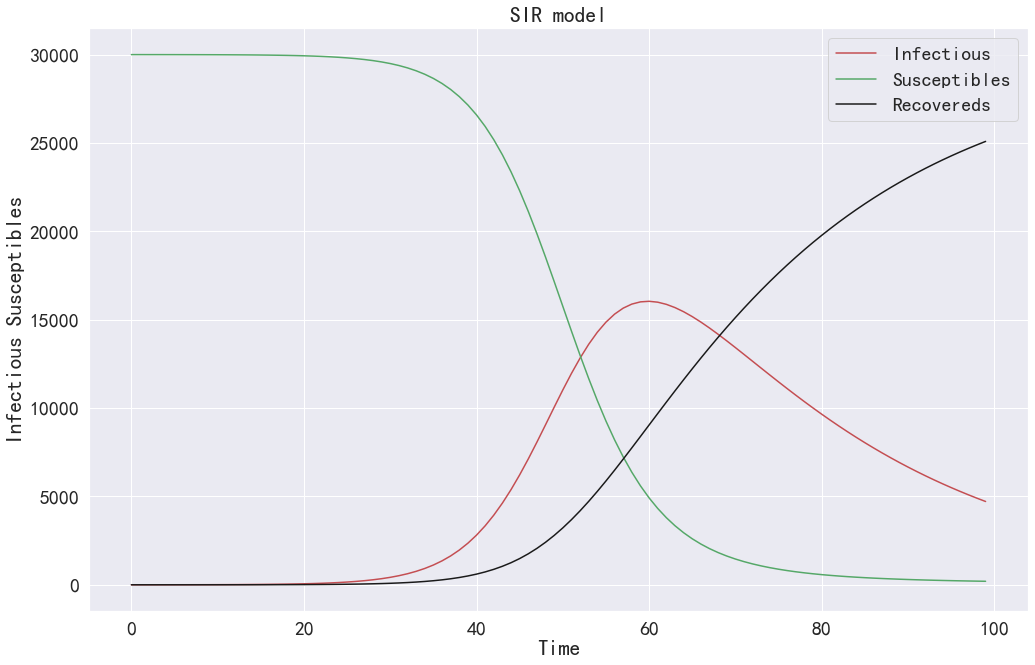

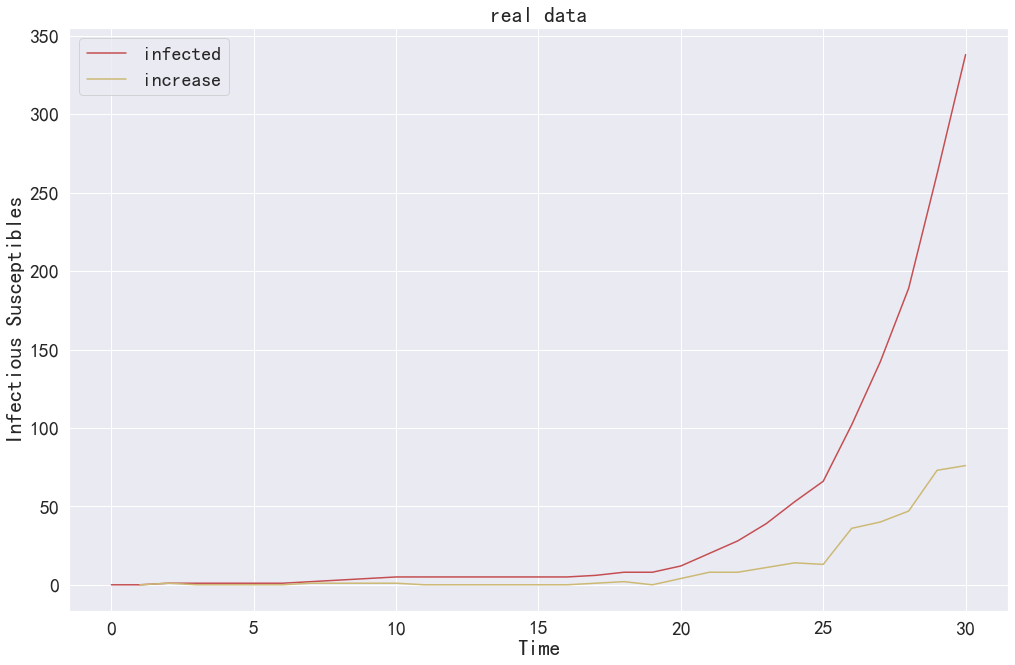

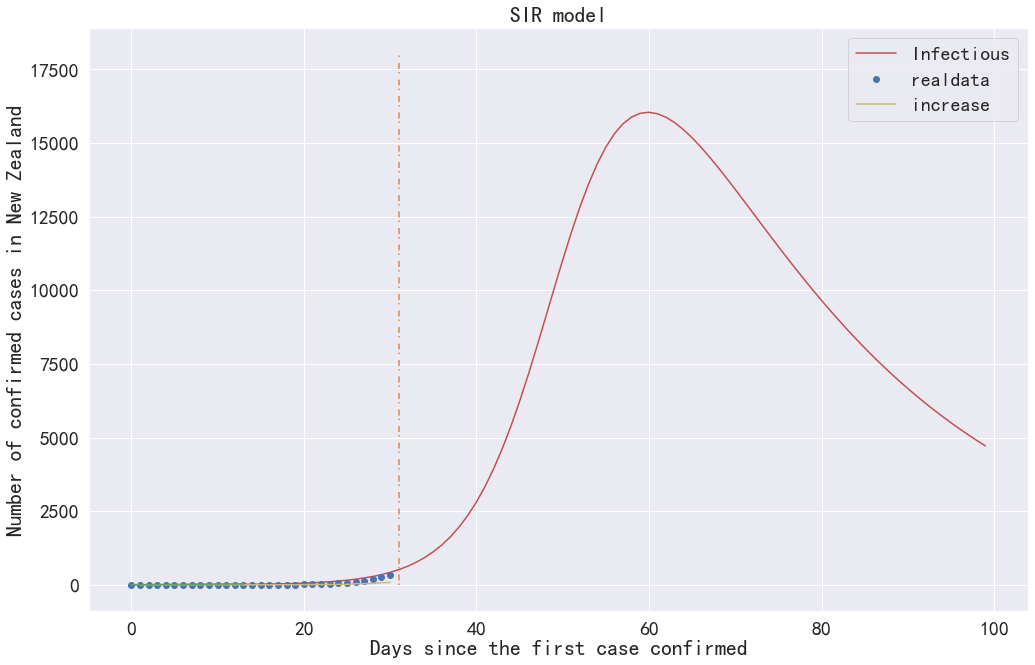

In [100]:
beta = 8e-6
gamma = 0.04
TS = 1.0108
ND = 100.0
S0 = 30000
I0 = 1
S1 = 20000
I1 = 338
INPUT = [S0, I0, 0.0]
INPUT_1 = [S1, I1, 0.0]


# 模型的差分方程
def diff_eqs(INP, t):
    Y = np.zeros((3))
    V = INP
    print(V)
    Y[0] = -beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y


if __name__ == "__main__":
    t_start = 0.0
    t_start_1 = 31.0
    t_end = ND
    t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    t_range_1 = np.arange(t_start_1, t_end+t_inc, t_inc)
    t_range_2 = np.arange(t_start, t_end+t_inc, t_inc)
    RES = spi.odeint(diff_eqs, INPUT, t_range)
    
    RES_1 = spi.odeint(diff_eqs, INPUT_1, t_range_1)
    
    RES_2 = spi.odeint(diff_eqs, INPUT, t_range_2)
    #print(S0,I0)
    print(RES)
    #print(len(RES))

    fig = pl.figure()
    pl.subplot(111)
    pl.plot(RES[:, 1], "-r", label = "Infectious")
    pl.plot(RES[:, 0], "-g", label = "Susceptibles")
    pl.plot(RES[:, 2], "-k", label = "Recovereds")
    pl.legend(loc = 0)
    pl.title("SIR model")
    pl.xlabel("Time")
    pl.ylabel("Infectious Susceptibles")
    pl.savefig("result.png")

# 读取数据
    data = ts_data_forecastts_1
    print(data)

# 数据作图
    fig = pl.figure()
    pl.subplot(111)
    pl.plot(data["Total to date"], "-r", label = "infected")
    pl.plot(data["Total to date"]-data["Total to date"].shift(1), "-y", label = "increase")
    pl.legend(loc = 0)
    pl.title("real data")
    pl.xlabel("Time")
    pl.ylabel("Infectious Susceptibles")
    pl.savefig("realdata.png")


    print("预测最大感染人数:%d 位置:%d" % (RES[:,1].max(), np.argmax(RES[:, 1])))
    print("预测感染人数:%d 位置:%d" % (RES[30:31,1].max(), 31))
# 将预测值与真实值画到一起
    fig = pl.figure()
    pl.subplot(111)
    pl.plot(RES[:, 1], "-r", label = "Infectious")
    pl.plot(data["Total to date"], "o", label = "realdata")
    pl.plot(data["Total to date"]-data["Total to date"].shift(1), "-y", label = "increase")
   # pl.plot([31:100],ydata.RES_1[:, 1],"-g", label = "Infectious after lockdown")
    #plt.annotate(s='Lockdown',xy=(31,262),xytext=(31,100))
    #plt.annotate('Lockdown', xy=(31, 262) ,xytext=(31, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
    plt.plot([31,31],[0,18000],dashes=[1,2,4,4])
   # plt.axhline(xy=([31,0]), color='r', linestyle='-')
    plt.plot([13,0],[31,0])
    pl.legend(loc = 0)
    pl.title("SIR model")
    pl.xlabel("Days since the first case confirmed")
    pl.ylabel("Number of confirmed cases in New Zealand")
    pl.savefig("test.png")
    print("Total of forecast:%d loc:%d" % (RES[30:31,1].max(), 31))